# Fernando Silva Aguilar
## Python Assignement

# 1. Documenting the function.

This is to import the required packages for the program to run.

In [1]:
from Bio import SeqIO
from Bio.Data import CodonTable
from Bio.Alphabet import SingleLetterAlphabet
import pandas as pd
import io
import requests

# 1. Function to get the sequences.

1. This is creating a function called get_sequences_from_file. Inside the brackets is a cmacro name that is going to be specified later when we invoke the function. This fasta_fn, should be the fasta file name including the format. The second line is saying to the program that we are going to print inside curly brackets the values from the subfunction sequence_data_dict (created later in the loop).

2. For the "for" line we have the following: record is a random name assigned to the loop. SeqIO.parse is the function to read the fasta file (fasta_fn). Inside the brackets we have to give the name of the file, in our function will be fasta_fn, followed by the file format.

3. Description line is a new variable in the loop to which we apply the function record.description.split, which is telling us that in the file record (random name we assigned), in the description stored values (fasta only store identifier, description, and sequence), apply the function of split, so the text is split into single words of the original text and creates new columns.

4. Species_name line is used to to add the name of the species, by printing from the description variable created the columns 2 (position 1) and 3 (position 2) with a space between them. 

5. The line for "sequence_data_dict" is giving the values for the variable created before the for loop. Here we assigned the sequence of each species and paste just after the species_name.

Then the return statement is to exit the function created.
Then when we run the function get_sequences_from_file(fasta_fn) we will obtain a dictionary wherer the key will be the name of the species and the values is the sequence. 

In [2]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

# 2. String-Translate Function

Next we create a function to translate the sequences into aminoacids.
- First we call the function CodonTable.unambiguous_dna_by_name from the Biopython package.
- Second we create a object equal to 3, to later recall it to split the sequences each 3 base pairs.
- third, create the object codon in which we split the string every 3 nucleotides. The for in this line is doing a funtion range from position 0 to the total lenght of the object and divide by the object n in the step portion of the range().
- Forth, we create the object aa_seq_string that is going to be filled later in the function.
- Fifth, the for loop in here is saying the program that delete the last codon which is the stop codon (TAA, TAG, AGA, AGG). This is done by the function range, in the stop position as the lenght of the object -1 "len(codon)-1".
- Sixth, we fill the aa_seq_string with the translation of the codons with the mito_table.forward_table function, and append that to have the whole amount of aminoacids in the object aa_seq_string.
- Finally, we return the object aa_seq_string.

If we want to get the translation from on key from the dictionary created before, we have to run like this:
    translate_function(string_nucleotides[Key])
Otherwise it will brng some errors.

In [3]:
def translate_function(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    n =3
    codon = [string_nucleotides[i:i+n] for i in range(0,len(string_nucleotides),n)]
    aa_seq_string=[]
    for w in range(0,len(codon)-1,1):
        aa_seq_string.append(mito_table.forward_table[codon[w]]) 
    return(str(aa_seq_string))

# 3. Alternative Function

An alternative way to translate the string is using the function translate function from Biopython.
This function works only for valus from a fasta file, so it force us to load the packages from biopython of allphabet "SingleLetterAlphabet" so we can interpret the sequence in the dictionary created in the first function "get_sequences_from_file".
- First we have to load the package seq from biopython.
- Inside the function translates we specify the type of table we want to work with because otherwise we will work with the default table from NCBI. Equally we specify if we have stop codon and if once he found it we have to stop the tranlation. More information is found in [link](http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc25).
This are the options of the function translate:
translate(sequence, table='Standard', stop_symbol='*', to_stop=False, cds=False, gap=None)

This function only works for values inside a dictionary, then when called we have to specify the key, for example string_nucleotides["key value"].

In [4]:
from Bio.Seq import Seq
def alt_trans_function(string_nucleotides): 
    aa_seq_string = string_nucleotides.translate(table="Vertebrate Mitochondrial", to_stop=True)
    return(str(aa_seq_string))

# 4. Molecular Weight of Aminoacid Sequence

To measure the molecular weight we have to load the package SeqUtils.ProtParam from Biopython.
Then we invoke the function proteinanazlysis and molecular_weight. Conditions of this function is that the input sequence of aminoacids has to be a string, so in our case we have to work with the output of the alternative or the translate function.

In [5]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
def compute_molecular_weight(aa_seq):
    analysed_seq = ProteinAnalysis(aa_seq)
    weight = analysed_seq.molecular_weight()
    return(weight)

# 6. GC Content Analysis

The function below is to count the number of G and C in the sequence. Fist we create an object (str) with the base pairs we do not want to count. Second we return the value with a for loop  of the G and C, as those elements in sequence (sequence has to be a string), that are not present in the object AT.

In [6]:
def GC_content(sequence):
    AT = "A T"
    A = len([GC for GC in sequence if GC not in AT])
    g = A/len(sequence)
    return(g)

# 7. MAIN FUNCTION

In order to read the files I work with the packages io and request. This will avoid the use of local files and instead we can download the files from the internet. I create a copy called mass1 in order to then create a full copy.  

In [7]:
url = "https://raw.githubusercontent.com/fsilvaag/BCB546X-Fall2017/master/Python_Assignment/penguins_mass.csv"
file = requests.get(url).content
penguins_df1 =pd.read_csv(io.StringIO(file.decode('utf-8')))
penguins_df = penguins_df1.copy()
penguins_df

,species,mass
0,Aptenodytes forsteri,28.00
1,Aptenodytes patagonicus,13.40
2,Eudyptes chrysocome,2.80
3,Eudyptes chrysolophus,4.50
4,Eudyptes sclateri,4.25
5,Eudyptula minor,1.60
6,Pygoscelis adeliae,4.60
7,Pygoscelis antarctica,4.10
8,Pygoscelis papua,6.10
9,Spheniscus demersus,3.20


To read the file in "penguins_cytb.fasta"we can use the package urllib and the module urlretrieve to read directly from internet (github in our case) the file. We have to give the exact url followed by the name of the file we want to import (penguins_cytb.fasta). 

In [8]:
import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/EEOB-BioData/BCB546X-Fall2017/master/Python_Assignment/penguins_cytb.fasta', 'penguins_cytb.fasta')

('penguins_cytb.fasta', <http.client.HTTPMessage at 0x236a17d81d0>)

The following is to read the file penguins_cytb.fasta and create the dictionary we especify in the first function.

In [9]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")
species_list = list(penguins_df.species)

# 6. Creation of two columns with values NaN
we can create the two new columns Moleculare Weight (Mole_Weight) and GC Content (GC_Content) and assigned the values NaN by using the function of pandas, concat and dataframes. The later function is to indicate the name and amount of columns to be added. By default python assign the values NaN if we do not specify any value.
The new columns will be included in an alphabetic order, then first will appear GC_Content, followed by Mole_weight, mass and species.

In [ ]:
pd.concat([penguins_df, pd.DataFrame(columns = [ 'Mole_weight', 'GC_Content'])]) 
# I would avoid this step and will create the columns at the same time I create the values for each  one

# 7. Molecular Weight and GC Content

The following loop is to create the columns Mole_weight and GC_Content with their respectives values.

TAA, TAG, AGA, AGG


In [10]:
GC_Con = [] # This is to store the iterative values created for the GC_content
Mol_Weight = [] # This is to store the iterative values created for the molecular weight

for key, value in cytb_seqs.items():  #This is to recall the dictionary per key and value
    if key in cytb_seqs: # To specify that the for loop is per each key.
        transl = alt_trans_function(cytb_seqs[key]) #Translation of the sequences in aminoacids
        weight = compute_molecular_weight(transl) # Computation of the molecular weight
        Mol_Weight.append(weight) # Creation of a list of the values of molecuar weight per key
        
        GC = GC_content(cytb_seqs[key]) # Content of GC per key
        GC_Con.append(GC) # Creation of a list of amount of GC per key

penguins_df['Mole_Weight'] = Mol_Weight # Creates a new column with thevalues created in the for loop
penguins_df['GC_Content'] = GC_Con # Creates a new column with thevalues created in the for loop
penguins_df

,species,mass,Mole_Weight,GC_Content
0,Aptenodytes forsteri,28.00,42459.6021,0.483815
1,Aptenodytes patagonicus,13.40,42563.7067,0.496938
2,Eudyptes chrysocome,2.80,42475.5753,0.511811
3,Eudyptes chrysolophus,4.50,42445.5493,0.509186
4,Eudyptes sclateri,4.25,42475.5753,0.508311
5,Eudyptula minor,1.60,42491.6408,0.492563
6,Pygoscelis adeliae,4.60,42458.6140,0.490814
7,Pygoscelis antarctica,4.10,42404.5423,0.477690
8,Pygoscelis papua,6.10,42595.8759,0.471566
9,Spheniscus demersus,3.20,42431.5490,0.482940


# 8. Plotting Mass vs Species Name

First we have to impot the respective packages to make plots

In [11]:
import seaborn as sns
import numpy as np

In [12]:
%matplotlib inline

The graphic can be made with [seaborn](https://seaborn.pydata.org/api.html#categorical-api) by using the function [barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot).

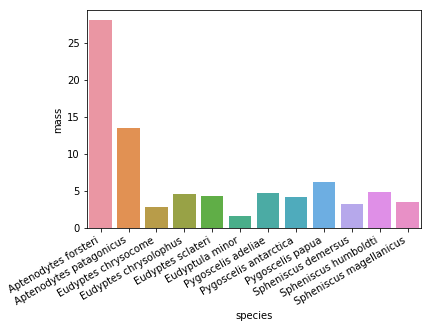

In [13]:
my_fig = sns.barplot(x = 'species', y= 'mass', hue_order='species', data = penguins_df)
my_fig.set_xticklabels(labels = penguins_df.species, rotation=30, horizontalalignment='right')

 **Q1 What is the smallest penguin species?** = The smallest species is Eudyptula minor, with a mass of 1.6.
 **Q2 What else is interesting about this species?** = This specie has one the largest content of GC and is the third specie with the largest molecular weight.

# 9. Plot Molecular weight Vs GC-content (x-axis).

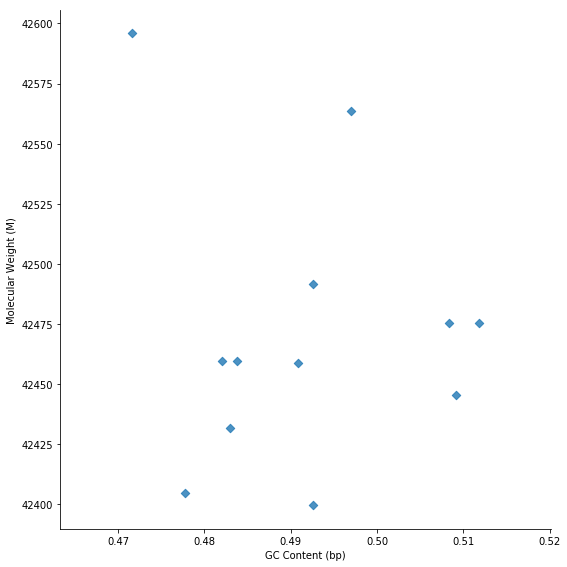

In [14]:
my_fig1 = sns.lmplot("GC_Content", "Mole_Weight", data=penguins_df, fit_reg=False, size=8, markers='D')
my_fig1.set_axis_labels('GC Content (bp)', 'Molecular Weight (M)')

# 10. New DataFrame

To export the data frame as csv, we use the function ["to_csv"](http://pandas.pydata.org/pandas-docs/version/0.20.3/generated/pandas.DataFrame.to_csv.html) from pandas.

In [15]:
penguins_df.to_csv('penguins_mass_cytb.csv', sep=',',index=False, encoding='utf-8', )

# 11. BONUS 

According to the [Murphy et al. (1990)](https://sora.unm.edu/sites/default/files/journals/condor/v092n04/p0913-p0921.pdf) the aminoacids Serine (S), Proline (P), Alanine (A), Glutamine (Q), Asparagine (N), Asparti acid (D), Glycine (G), and Glutamine Acid (E), are non essential for the formationof the feather in penguins. The following function is to count the amount of non essential and essential amino acids in each species. 

In [16]:
def essential(sequence):
    Non_essential = " S P A D G E Q N"
    return len([essen for essen in sequence if essen not in Non_essential])

Then we proceed to make the count of essential amino acids per especies.

In [17]:
aa_essential = []
total_aa = []
for key, value in cytb_seqs.items():  #This is to recall the dictionary per key and value
    if key in cytb_seqs: # To specify that the for loop is per each key.
        transl = alt_trans_function(cytb_seqs[key]) #Translation of the sequences in aminoacids
        count = essential(transl)
        aa_essential.append(count)
        total_aa.append(len(transl))

penguins_df['Total_aa'] = total_aa # Creates a new column with thevalues created in the for loop
penguins_df['Essential'] = aa_essential # Creates a new column with thevalues created in the for loop
penguins_df['Non_Essential'] = penguins_df['Total_aa'] - penguins_df['Essential']
penguins_df['%_Essential'] = penguins_df['Essential']/penguins_df['Total_aa']
penguins_df
        

,species,mass,Mole_Weight,GC_Content,Total_aa,Essential,Non_Essential,%_Essential
0,Aptenodytes forsteri,28.00,42459.6021,0.483815,380,236,144,0.621053
1,Aptenodytes patagonicus,13.40,42563.7067,0.496938,380,239,141,0.628947
2,Eudyptes chrysocome,2.80,42475.5753,0.511811,380,239,141,0.628947
3,Eudyptes chrysolophus,4.50,42445.5493,0.509186,380,238,142,0.626316
4,Eudyptes sclateri,4.25,42475.5753,0.508311,380,239,141,0.628947
5,Eudyptula minor,1.60,42491.6408,0.492563,380,238,142,0.626316
6,Pygoscelis adeliae,4.60,42458.6140,0.490814,380,235,145,0.618421
7,Pygoscelis antarctica,4.10,42404.5423,0.477690,380,237,143,0.623684
8,Pygoscelis papua,6.10,42595.8759,0.471566,380,238,142,0.626316
9,Spheniscus demersus,3.20,42431.5490,0.482940,380,235,145,0.618421


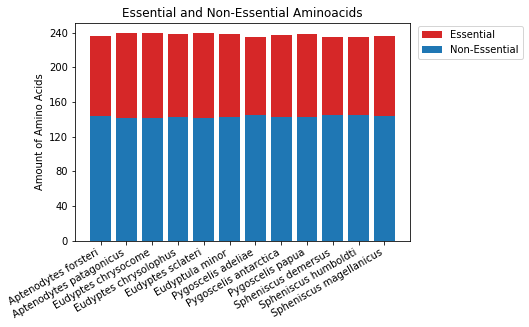

In [18]:
import matplotlib.pyplot as plt

ind = np.arange(len(penguins_df))    

p1 = plt.bar(ind, penguins_df.Essential, color='#d62728')
p2 = plt.bar(ind, penguins_df.Non_Essential)

plt.ylabel('Amount of Amino Acids')
plt.title('Essential and Non-Essential Aminoacids')
plt.xticks(ind, penguins_df.species, rotation = 30, horizontalalignment = 'right' )
plt.yticks(np.arange(0, 280, 40))
plt.legend((p1[0], p2[0]), ('Essential', 'Non-Essential'), bbox_to_anchor=(1.01, 1.01))
plt.show()

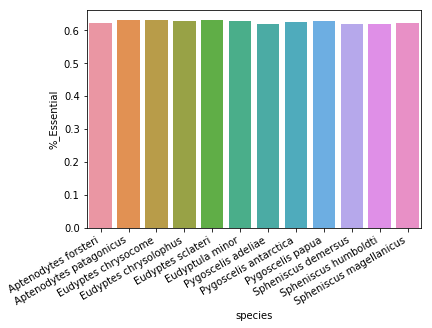

In [19]:
my_fig2 = sns.barplot(x = 'species', y= '%_Essential', hue_order='species', data = penguins_df)
my_fig2.set_xticklabels(labels = penguins_df.species, rotation=30, horizontalalignment='right')